# Training notebook

* notebooks make sense when used as scripts by humans
* used just for the training part
* uses library extracted
* only training code is still here to be copied and decoupled
* the rest is just instrumentation of stable libraries (which are not copied)
* if you want to change or extend library this follows the same rules as in traditional software development


In [1]:
# https://ipython.org/ipython-doc/3/config/extensions/autoreload.html

%load_ext autoreload
%autoreload 2

In [2]:
import sys 
sys.path.append('../lib')

In [3]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
tf.__version__

2022-05-15 16:34:38.231224: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-15 16:34:38.231261: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


'2.8.0'

In [4]:
tf.random.set_seed(42)

In [5]:
import numpy as np
np.__version__

'1.22.3'

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (20, 8)
mpl.rcParams['axes.titlesize'] = 24
mpl.rcParams['axes.labelsize'] = 20

In [7]:
import sys

if 'google.colab' in sys.modules:
    !pip install -q dtreeviz
    !pip install -q lrcurve

# Step 1: Loading and exploring our data set

In [8]:
from data import InsuranceData
insuranceData = InsuranceData()

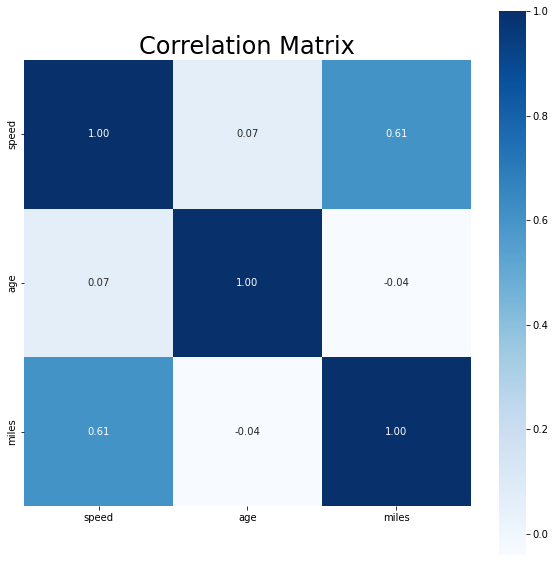

In [9]:
from viz import plot_correlation_matrix
plot_correlation_matrix(insuranceData.get_correlations());

# Step 2: Training a neural network on 2 dimensions of the data

In [10]:
### XXX: THIS IS THE PART THAT ACAUTLLY WANTS TO BE COPIED AND DECOUPLED, THE REST IS JUST INSTRUMENTATION

from tensorflow.keras.layers import InputLayer, Dense, Dropout, \
                                    BatchNormalization, Activation

num_features = insuranceData.dims
dropout = 0.6
model = tf.keras.Sequential()

model.add(InputLayer(name='input', input_shape=(num_features,)))

model.add(Dense(500, name='hidden1'))
model.add(Activation('relu'))
model.add(BatchNormalization())
# model.add(Dropout(dropout))

model.add(Dense(500, name='hidden2'))
model.add(Activation('relu'))
model.add(BatchNormalization())
# model.add(Dropout(dropout))

model.add(Dense(500, name='hidden3'))
model.add(Activation('relu'))
model.add(BatchNormalization())
# model.add(Dropout(dropout))

model.add(Dense(name='output', units=3, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 500)               1500      
                                                                 
 activation (Activation)     (None, 500)               0         
                                                                 
 batch_normalization (BatchN  (None, 500)              2000      
 ormalization)                                                   
                                                                 
 hidden2 (Dense)             (None, 500)               250500    
                                                                 
 activation_1 (Activation)   (None, 500)               0         
                                                                 
 batch_normalization_1 (Batc  (None, 500)              2000      
 hNormalization)                                        

2022-05-15 16:34:48.960222: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-05-15 16:34:48.960257: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-15 16:34:48.960268: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-BEN73DP): /proc/driver/nvidia/version does not exist
2022-05-15 16:34:48.960408: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
from TrainableInsuranceModel import TrainableInsuranceModel
insurance_model = TrainableInsuranceModel(model, insuranceData)

In [12]:
insurance_model.train();

In [13]:
(train_loss, train_metric), (test_loss, test_metric) = insurance_model.evaluate()
# train_loss, test_loss 
train_metric, test_metric

(0.715833306312561, 0.6633333563804626)

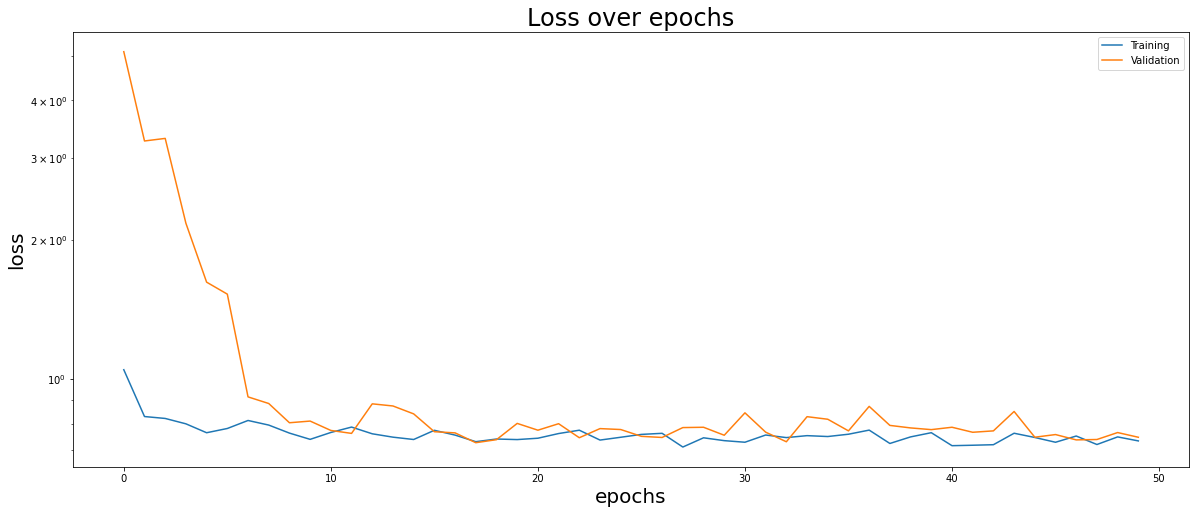

In [14]:
insurance_model.plot_loss();

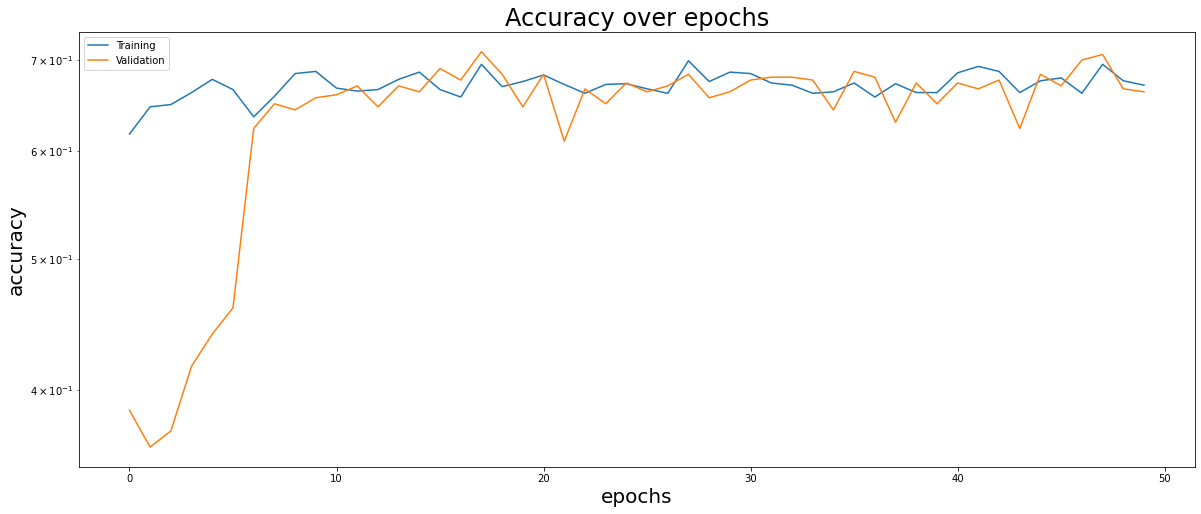

In [15]:
insurance_model.plot_accuracy()

In [16]:
insurance_model.check_model_invariants()

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


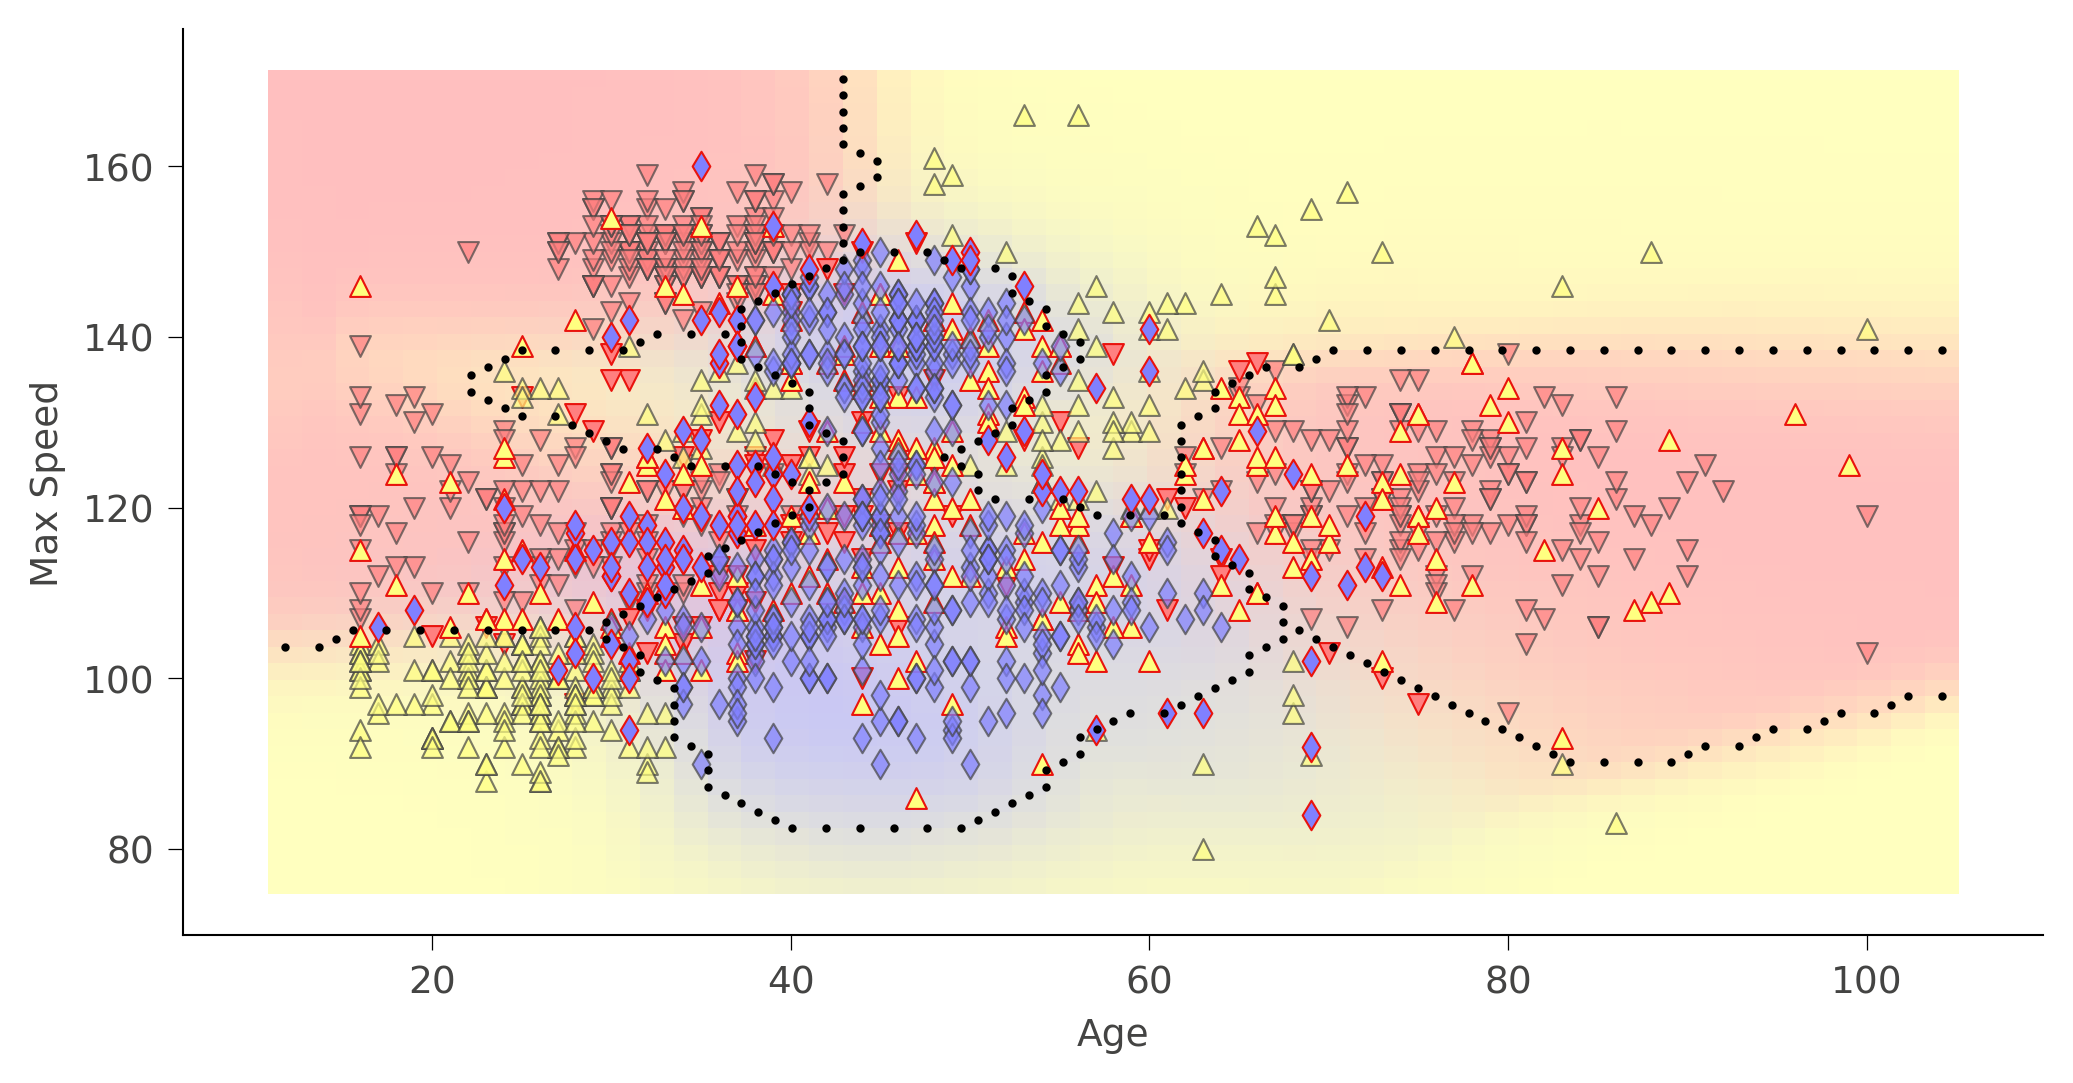

In [17]:
insurance_model.plot_decision_boundaries()

In [18]:
!ls -l

total 13108
-rw-r--r-- 1 olli olli 1370193 May 12 12:41 1_all.ipynb
-rw-r--r-- 1 olli olli    9188 May 15 16:34 2_train.ipynb
-rw-r--r-- 1 olli olli  126883 May  9 12:33 3_serve.ipynb
drwxr-xr-x 2 olli olli    4096 May 15 10:41 __pycache__
drwxr-xr-x 4 olli olli    4096 May 15 16:34 classifier
-rw-r--r-- 1 olli olli 5733715 May 15 16:34 classifier.tgz
-rw-r--r-- 1 olli olli 6167040 May 15 16:34 keras_model.h5


In [19]:
insurance_model.save_model('classifier', keras_format=False)

2022-05-15 16:35:01.376194: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: classifier/assets


In [20]:
!ls -l classifier/

total 288
drwxr-xr-x 2 olli olli   4096 May 15 10:41 assets
-rw-r--r-- 1 olli olli  19134 May 15 16:35 keras_metadata.pb
-rw-r--r-- 1 olli olli 264369 May 15 16:35 saved_model.pb
drwxr-xr-x 2 olli olli   4096 May 15 16:35 variables


In [21]:
!tar czvf classifier.tgz ./classifier

./classifier/
./classifier/keras_metadata.pb
./classifier/saved_model.pb
./classifier/assets/
./classifier/variables/
./classifier/variables/variables.index
./classifier/variables/variables.data-00000-of-00001


In [22]:
insurance_model.save_model('keras_model', keras_format=True)

In [23]:
!ls -l keras_model.h5

-rw-r--r-- 1 olli olli 6167040 May 15 16:35 keras_model.h5
